In [1]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

### Defining The Problem

#### Set Up

##### Example 1

We have already seen the *House Votes* data set whose first five rows are given below.

In [2]:
data = pd.read_csv('house_votes_prepped.csv')
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,Y
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


Note that the columns are given the names $f_1,f_2,f_3,...,f_{16}$, and $Y$.  

The GOAL of Machine Learning is to use the *predictors* ($f_1,f_2,f_3,...,f_{16}$ in this case) to create a model that will accurately predict the *response* (the values in the Y column).  Other words for *predictor* are *feature* or *column*.

$\Box$

In ML, we assume that there is an underlying structure (a function) in the form of a function $f(X)$, where $X=(f_1,f_2,...,f_{16})$, such that $f(X) = Y$. 

However, we DO NOT assume that $Y = f(X)$, since this would not accurately capture what often happens in real world applications.  In real world applications, there is *random noise* that clouds our understanding of the relationship between predictors and response.  We will use the symbol $\epsilon$ to stand for this random noise.  We further assume that the distribution of $\epsilon$ has mean 0. 

Thus, the relationship that we assume to exist between the predictors ($f_1,f_2,...,f_{16}$) and response ($Y$) is given by the equation $$Y=f(X)+ \epsilon$$

In general, given a dataset with predictors $X_1,X_2,...,X_p$ and response $Y$, we assume that there is a function $f$ such that $$Y = f(X)+\epsilon$$ where $X=(X_1,X_2,...,X_p)$ and $\epsilon$ has mean 0.  We call $\epsilon$ the *irreducible* error.

In real life applications, we will *never* be able to actually find the function $f(X)$.  Instead, we seek to approximate it by using the rows in our dataset to *learn* a function $\hat{f}(X)$ such that $\hat{f}\approx f$.  Thus, our goal is to find $\hat{f}$ such that $$Y\approx \hat{f}(X)$$

There are two, broad categories of models used for machine learning: *parametric* and *non-parametric*.  Parametric models assume that the underlying structure to the relationship between the predictors and response has a particular form determined by *parameters*.  Non-parametric models do not assume that parameters determine $f$.

In this class, we will only consider two parmetric models: *linear regression* and *logistic regression*.

#### Learning Parameters

##### Example 2

So far in this class we have looked only at *binary classification* problems.  In this example, we look at a *regression* problem.  The goal in a regression problem is to predict a real number $y$ sucth that number $(-\infty \leq y \leq \infty)$ as opposed to a label (0 or 1).

We begin by creating a simple dataset consisting of two columns $X$ (the predictor) and $Y$ (the response) such that there is a positive correlation between the value of $X$ and $Y$.  To simulate a real world situation and follow our underlying assumptions, we will introduce some random noise $\epsilon$.

In [3]:
p = 2
predictor = np.arange(1,10**p+1)
noise = 5*np.random.normal(size = (10**p,))+10
response = np.array([0.5*predictor[i]+1+noise[i] for i in range(10**p)])

The graph of our data is given below.

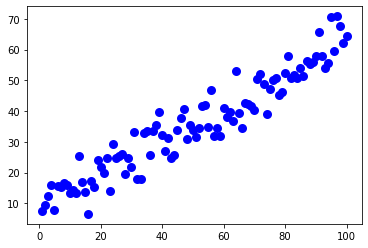

In [4]:
plt.scatter(predictor, response, color="blue", linewidth=3)

As we can see, there is a positive correlation between the predictor ($X$) and the response ($Y$).  This tells us that *linear regression* might be a good technique to use to find $\hat{f}$ such that $\hat{f} \approx f$.  In linear regression with just two columns (often called simple linear regression), we assume that $f(X) = \beta_0+\beta_1\cdot X$ and use the data to approximate the slope $\beta_1$ and y-intercept $\beta_0$.  

$\beta_1$ and $\beta_0$ are called the *parameters* of our assumed model $f(x)$.

These approximate versions of the slope and y-intercept are denoted $\hat{\beta_1}$ and $\hat{\beta_0}$.  That is, $\hat{\beta_1}\approx \beta_1$ and $\hat{\beta_0}\approx \beta_0$. 

There are many ways to use our data to approximate $\hat{\beta_1}$ and $\hat{\beta_0}$.  In the spirit of Machine Learning, we will define a *loss function* (or error function) and use *gradient descent* to find values of $\hat{\beta_1}$ and $\hat{\beta_0}$ such that $\hat{f}(X) = \hat{\beta_0}+\hat{\beta_1}X$ gives a good approximation of $Y$.  

This [video](https://youtu.be/4PHI11lX11I?si=RvdIBoKLTtqaW0Xw) gives a good explanation of using gradient descent to approximate the slope and y-intercept for data consisting of two columns (predictor and response).

To do this, we perform a train test split of the data.

In [5]:
X_train,X_test,y_train,y_test=train_test_split(predictor, response, test_size=0.25, random_state=250)

Instantiate the model object.

In [6]:
model = LinearRegression()

Train (fit) the model.

In [7]:
#Reshape X_train
X_train = X_train.reshape(X_train.shape[0],1)
model.fit(X_train, y_train)

LinearRegression()

Make predictions to see how well our model performs.

In [8]:
y_pred = model.predict(X_test.reshape(-1,1))
mean_squared_error(y_test, y_pred)

18.45908140926336

We can use the *coef_* and *intercept_* attributes to get $\hat{\beta}_1$ and $\hat{\beta}_0$ for our model.

In [11]:
beta_hat_1 = model.coef_[0]
beta_hat_1

0.5230823260754627

In [12]:
beta_hat_0 = model.intercept_
beta_hat_0

9.615243195430985

Now, lets plot our model in red and compare it to our data.

In [13]:
predicted_response = np.array([beta_hat_1*x+beta_hat_0 for x in predictor])

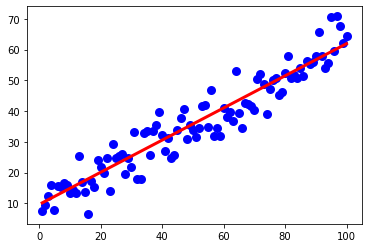

In [14]:
plt.plot(predictor, predicted_response, color = "red", linewidth = 3)
plt.scatter(predictor, response, color="blue", linewidth=3)

$\Box$

### Loss Function

A *loss function* or (error function) measures how close a predicted value $\hat{y}$ is to the actual value $y \in Y$.  The basic idea for a loss function is:
+ If $\hat{y}$ is not very close to $y$, then the loss should be big.  
+ If $\hat{y}$ is close to $y$, then the loss should be small.  

As we will see, the loss function is a function of the parameters for the model.  The graph of the loss function defines a surface in $\mathbb{R}^n$.  We use *Gradient Descent* to find a minimum (bottom of a valley) on this surface defined by the loss function.  This minimum gives the parameters that minimize the loss (or error) between our predictions $\hat{y}$ and $y$. 

##### Example 3: Loss Function for Example 2

In linear regression the most commonly used loss function is the *Mean Squared Error* function.  This is typically written as $$\text{MSE} = \frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2$$ where the data set has $N$ data points.

This form hides the fact that the MSE loss function is a function of the parameters $\beta_0, \beta_1,...,\beta_p$.  To see this last fact, recall that in Example 2, we assumed our function $f$ to have the form $f(X) = \beta_0+\beta_1 X$.

In Example 2 we had 100 data points of the form $(x_i,y_i)$.  Given values for $\beta_0$ and $\beta_1$, we can compute $\hat{y}_i = \beta_0+\beta_1x_i$.

Thus, MSE $= \frac{1}{100}\sum_{i=1}^{100} (y_i-\hat{y}_i)^2$

$= \frac{1}{100}\sum_{i=1}^{100} (y_i-(\beta_0+\beta_1x_i))^2$

$= \frac{1}{100} \cdot ((y_1-(\beta_0+\beta_1x_1i))^2+(y_2-(\beta_0+\beta_1x_2))^2+...+(y_{100}-(\beta_0+\beta_1x_{100}))^2)$.

In this last expression of the MSE, note that all of the $x_i$'s and $y_i$'s are fixed values.  

Since the MSE for example 2 is a function of $\beta_0$ and $\beta_1$, we can replace MSE with $L(\beta_0,\beta_1)$ to obtain $$L(\beta_0,\beta_1) = \frac{1}{100}\sum_{i=1}^{100} (\hat{y}_i-y_i)^2$$

This shows that the loss function $L(\beta_0,\beta_1)$ is a function of two real numbers.  Thus, the graph of $L(\beta_0,\beta_1)$ is a 3D surface defined by the parameters $\beta_0$ and $\beta_1$.

The function below implements $L(\beta_0,\beta_1)$.

In [15]:
def L(beta0, beta1):
    y_pred = np.array([beta1*x+beta0 for x in X_train])
    return mean_squared_error(y_pred, y_train)

In [16]:
loss = pd.DataFrame({'beta0':[1,10, 10,10,beta_hat_0], 'beta1':[1,0.3, 0.4,0.45, beta_hat_1]})
loss['L(beta0, beta1)'] = loss[['beta0', 'beta1']].apply(lambda x: L(x[0], x[1]), axis = 1)
loss

,beta0,beta1,"L(beta0, beta1)"
0,1.000000,1.000000,483.802773
1,10.000000,0.300000,194.034510
2,10.000000,0.400000,74.783308
3,10.000000,0.450000,41.858507
4,9.615243,0.523082,25.609715


$\Box$

##### Example 4

Now, we create a dataset and train a regression model using *multi-linear regression* to predict the values of $Y$.

In [17]:
p = 4
X_1 = np.random.normal(size = (10**p))
X_2 = np.random.normal(size = (10**p))
Y = X_1 + X_2

The first five rows of our dataset is given below. 

In [18]:
pd.DataFrame({'X1':X_1, 'X2':X_2, 'Y':Y}).head()

,X1,X2,Y
0,0.989897,0.415601,1.405497
1,-0.693837,-0.729824,-1.423661
2,-1.726997,-0.778337,-2.505334
3,1.943179,0.344894,2.288073
4,0.100053,0.350699,0.450752


We visualize the correlations below.

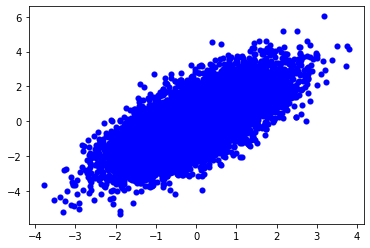

In [19]:
plt.scatter(X_1, Y, color="blue", linewidth=0.1)

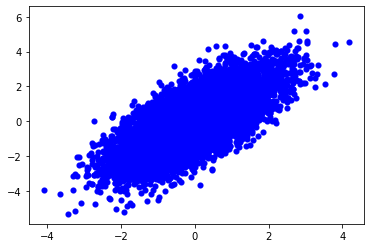

In [20]:
plt.scatter(X_2, Y, color="blue", linewidth=0.1)

Now, lets train the model.  Since there are two predictors ($X_1$ and $X_2$) this time and we have decided to use multi-linear regression, we assume that our model will have the form $$f(X) = \beta_0+\beta_1X_1+\beta_2X_2$$ where $X = (X_1, X_2)$. 

Since $Y=f(X)$, we see that our function can be rewritten in the form $$Y -\beta_1X_1-\beta_2X_2 = \beta_0$$  This shows that, instead of our model being a line (as was the case for one predictor), it is now a plane.  This makes sense since our data is three dimensional. 

To set up for using Sci-Kit Learn's SGDRegressor, we need to put $X_1$ and $X_2$ into one input matrix $X$.

In [21]:
X = np.array([X_1, X_2])

Unfortunately, this has the wrong shape.  We want two columns, not 10000.

In [22]:
X.shape

(2, 10000)

This is one of the many situations that the transpose operator helps a lot.

In [23]:
X = X.T

In [24]:
X.shape

(10000, 2)

Now, we are ready to train our model.

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.25, random_state=250)

In [26]:
model = SGDRegressor(penalty = None)

In [27]:
model.fit(X_train, y_train)

SGDRegressor(penalty=None)

In [28]:
y_pred = model.predict(X_test)

In [29]:
mean_squared_error(y_pred, y_test)

4.0382657151832715e-29

In [30]:
model.coef_

array([1., 1.])

In [31]:
model.intercept_

array([-5.3732497e-17])

$\Box$

### Dot Product

The *dot product* from Linear Algebra can be used to write the equation for multi-linear regression in a more compact form. 

#### Vectors

The rows in the input matrices $X$ above are vectors.  

In Vector Calculus, the notation for a vector $x$ is usually something like $$\vec{x} = <x_1,x_2,...,x_n>$$

However, in Linear Algebra, the notation for a vector $x$ is a column vector (an $N \times 1$ matrix) like $$x = \begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n \\
\end{pmatrix}$$

#### Dot Product

Given two vectors $x = <x_1,x_2,...,x_n> = \begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n \\
\end{pmatrix}$ and $y = <y_1,y_2,...,y_n> = \begin{pmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \\
\end{pmatrix}$, the dot product is defined as $$x \cdot y = <x_1,x_2,...,x_n>\cdot <y_1,y_2,...,y_n> = \begin{pmatrix}
    x_1 x_2 \dots x_n \\
\end{pmatrix}\cdot \begin{pmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \\
\end{pmatrix} = x_1\cdot y_1+x_2\cdot y_2+...+x_n\cdot y_n$$

In Machine Learning literature, the Linear Algebra notation is the standard.  

Using this notation, we can express the dot product of two vectors $x = \begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n \\
\end{pmatrix}$ and $y = \begin{pmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \\
\end{pmatrix}$ as 

$$x^Ty = \begin{pmatrix}
    x_1 x_2 \dots x_n \\
\end{pmatrix}\cdot \begin{pmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \\
\end{pmatrix} = x_1\cdot y_1+x_2\cdot y_2+...+x_n\cdot y_n$$

#### Compact Notation

With the notation above in hand, we can express our function $f$ from Example 3 as $$f(X) = \beta_0+\beta^TX$$ where $\beta = \begin{pmatrix}
    \beta_1 \\
    \beta_2 \\
\end{pmatrix}$ and $X = \begin{pmatrix}
    X_1 \\
    X_2 \\
\end{pmatrix}$.

The vector $\beta = \begin{pmatrix}
    \beta_1 \\
    \beta_2 \\
\end{pmatrix}$ is called a *parameter vector* since it contains parameters.  The standard symbol for the parameter vector is $\theta$.  Thus, $f(X) = \beta_0+\theta^TX$.

As yet another notational simplification, we can define $\theta = \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2 \\
\end{pmatrix}$ and $X = \begin{pmatrix}
    1 \\
    X_1 \\
    X_2 \\
\end{pmatrix}$ so that we have 

$$f(X) = \theta^TX$$

In general, the equation for multi-linear regression has the form $f(X) = \beta_0+\beta_1X_1+\beta_2X_2+...+\beta_nX_n$ which can be written as 

$$f(X) = \theta^TX$$ where $\theta = \begin{pmatrix}
    \beta_0 \\
    \beta_1 \\
    \vdots \\
    \beta_n \\
\end{pmatrix}$ and $X = \begin{pmatrix}
    1 \\
    X_1 \\
    \vdots \\
    X_n \\
\end{pmatrix}$.